## 6.4 Machine Learning Part 1

### Hypothesis: The higher a country's GDP (Gross Domestic Product), the lower its "energy intensity level" (Energy Intensity Level of Primary Energy) will be.

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path=r'/Users/nikolinastekovic/Library/CloudStorage/OneDrive-Personal/CF DATA ANALYICS/Immerse/6-Advanced Analytics and Dashboard Design'

In [5]:
# Import the sustainable energy data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'global-data-on-sustainable-energy_clean.csv'), index_col = False)

### 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'Country', 'Year',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df.head(20)

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,0,Afghanistan,2000,1.613591,6.20,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.400000,13283.800000,60,652230.0,33.93911,67.709953
1,1,Afghanistan,2001,4.074574,7.20,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.400000,13283.800000,60,652230.0,33.93911,67.709953
2,2,Afghanistan,2002,9.409158,8.20,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.400000,179.426579,60,652230.0,33.93911,67.709953
3,3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,8,Afghanistan,2008,42.400000,16.70,21.17,0.19,0.0,0.54,73.972600,607.83350,1.94,3559.999943,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,9,Afghanistan,2009,46.740050,18.40,16.53,0.16,0.0,0.78,82.978720,975.04816,2.25,4880.000114,21.390528,437.268740,60,652230.0,33.93911,67.709953


In [8]:
df.shape

(3648, 19)

In [9]:
#Drop column Unnamed: 0

df.drop(['Unnamed: 0'], axis = 1, inplace = True)

##### Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country                                                             0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)    

##### Duplicates check

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(3648,)

##### Extreme values checks

/var/folders/p4/0vwc9bn137jd4v8nzv7p6ghw0000gn/T/ipykernel_69286/3003081517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'], bins=25) # Shows extreme values


<Axes: xlabel='Energy intensity level of primary energy (MJ/$2017 PPP GDP)', ylabel='Density'>

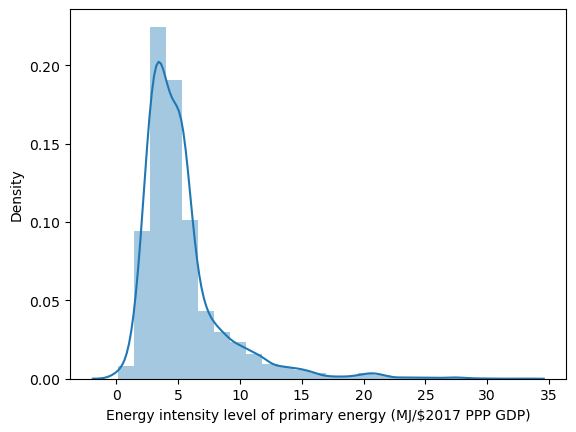

In [14]:
sns.distplot(df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [16]:
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean() # Check the mean

5.306930288569079

In [ ]:
Index(['Year',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [17]:
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].median() # Check the median

4.48

In [18]:
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].max() # Check the max

32.57

### 3. Data prep for regression analysis 

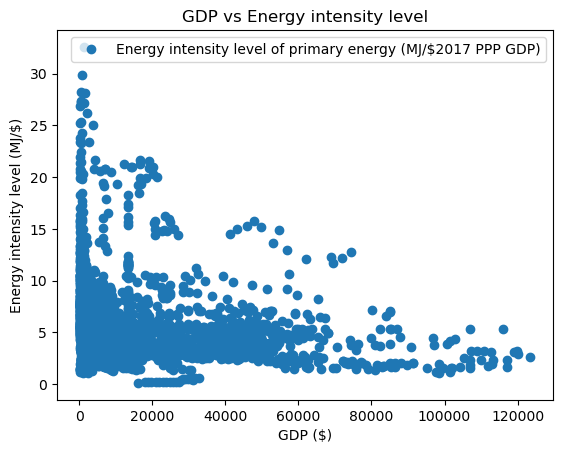

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'gdp_per_capita', y='Energy intensity level of primary energy (MJ/$2017 PPP GDP)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP vs Energy intensity level')  
plt.xlabel('GDP ($)')  
plt.ylabel('Energy intensity level (MJ/$)')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].values.reshape(-1,1)

In [21]:
X

array([[13283.8      ],
       [13283.8      ],
       [  179.4265792],
       ...,
       [ 1254.642265 ],
       [ 1316.740657 ],
       [ 1214.50982  ]])

In [22]:
y

array([[ 1.64],
       [ 1.74],
       [ 1.4 ],
       ...,
       [ 9.83],
       [10.47],
       [10.  ]])

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

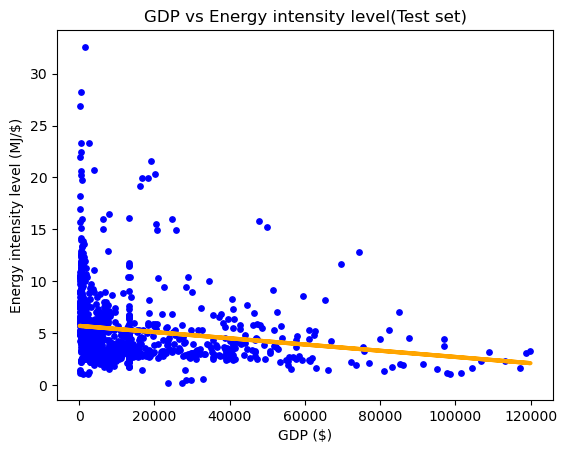

In [48]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('GDP vs Energy intensity level(Test set)')
plot_test.xlabel('GDP ($)')
plot_test.ylabel('Energy intensity level (MJ/$)')
plot_test.show()

### Linear model represented doesn’t perfectly cover all of the data points. In the area where the Energy intensity level is low (up to 1500 MJ/),  there are still many data points that indicate low GDP, which contradicts the hypothesis.

In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [40]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.99640059e-05]]
Mean squared error:  11.44784741039778
R2 score:  0.03699569019994875


In [41]:
y_predicted

array([[5.69232633],
       [5.69719332],
       [5.62670928],
       ...,
       [5.51747754],
       [5.69876635],
       [5.65557912]])

In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.00,5.692326
1,7.05,5.697193
2,3.54,5.626709
3,3.78,5.292429
4,6.49,5.658620
5,4.47,5.685155
6,5.30,5.668666
7,3.90,5.573114
8,5.30,5.309315
9,3.97,5.332424


##### Compare how the regression fits the training set

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.99640059e-05]]
Mean squared error:  11.398138259010706
R2 score:  0.027102582724644275


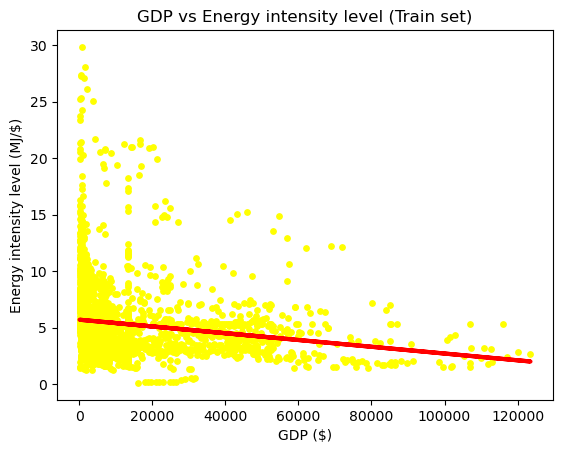

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='yellow', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP vs Energy intensity level (Train set)')
plot_test.xlabel('GDP ($)')
plot_test.ylabel('Energy intensity level (MJ/$)')
plot_test.show()

### Model fits the training a even less than the test set (R2= 0.027). It confirms that the relationship isn’t purely linear.
## Knowing this, we can be sure that the hypothesis is not correct.